Suppose we have a function $f : \mathbb{R} \to \mathbb{R}$.  This just means that $f$ takes a scalar input $x$ and maps it to some output $f(x)$.  The goal of this notebook is to explore two different ways to numerically approximate $f$ on a closed interval $[-L,L]$.  The basic idea is that it is *impossible* to store all values of $f(x)$ on this closed interval, because the number of points in $[-L,L]$ is uncountably infinite.  Hence we must approximate.

In [1]:
import numpy as np

We begin with a simple approach.  Consider a grid of $2N+1$ points $\{x_{-N}, \ldots, x_0, \ldots, x_N\}$.  To keep things simple, let's take this grid to be equispaced and centered at $0$:
\begin{equation*}
x_j = j (\Delta x)
\end{equation*}
where $\Delta x = L/N$.

In [222]:
L = 1
N = 5
dx = L/N
xgrid = np.arange(-N,N+1)*dx
print(xgrid)

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]


Now we define a function.  For starters, let's take $f(x) = x^2$.

In [223]:
def f(x):
    return x**2

Now we evaluate the function on the grid, and we have our approximation!  We can plot it to make sure we've done things correctly.

In [224]:
fgrid = f(xgrid)

In [225]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

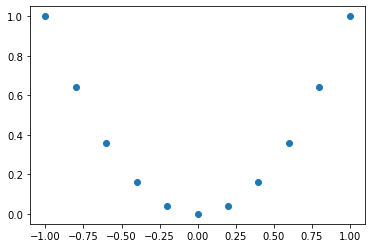

In [226]:
plt.scatter(xgrid, fgrid)
plt.show()

In terms of mathematics, what we have done is evaluated the function on a grid, to produce
\begin{equation*}
f_j = f(x_j).
\end{equation*}
But are we done?  I have purposely used a scatter plot above to show that, in fact, we have not yet defined what happens *in between* the grid points.  If we want to do something like *use* our numerical approximation of $f(x)$ for the purposes of integration, then we *need* to know what happens in between grid points.

Let $g$ denote our first numerical approximation of $f$.  One way forward is to assume that $g$ is piecewise constant.  Then we have
\begin{equation*}
g(x) = f_{j^\ast} \text{ with } j^\ast = \operatorname{argmin}_j |x - x_j|
\end{equation*}

In [227]:
def g(x):
    jstar = np.argmin(np.abs(x - xgrid))
    return fgrid[jstar]

Let's suppose that the grid $\{x_j\}_{j=-N}^N$ is the grid of points at which the *true* values of $f(x)$ are available.  For the purposes of plotting, let us use a finer grid $\{ \xi_j \}_{j=-N}^N$.

In [228]:
Nxi = 1000
Lxi = -1
dxi = Lxi/Nxi
xigrid = np.arange(-Nxi,Nxi+1)*dxi
ggrid = np.array(list(map(g, xigrid)))

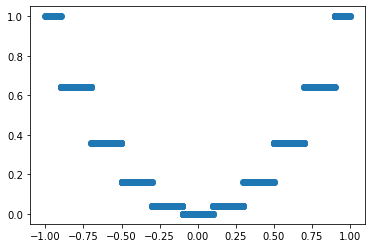

In [229]:
plt.scatter(xigrid, ggrid)
plt.show()

We can evaluate the mean-squared error of this approximation:

In [230]:
gmse = np.mean( (ggrid - f(xigrid))**2 )
print(gmse)

0.004448129268665666


Now as an alternative approach, let's consider collocation with Gaussian basis functions.  Let's consider a collection of $2N+1$ Gaussian probability density functions, one per grid point.  Let the $j$-th such Gaussian have mean $x_j$ and variance $\sigma^2$:
\begin{equation*}
G_j(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left[ - \frac{ (x-x_j)^2 }{ 2 \sigma^2 } \right]
\end{equation*}

Then the collocation approximation $h$ to the function $f$ is a linear combination of these basis functions:
\begin{equation*}
h(x) = \sum_{j=-N}^N \alpha_j G_j(x)
\end{equation*}

In [231]:
def h(x):
    gout = 0.0
    for j in range(2*N+1):
        gout += alpha[j]*((2*np.pi*sigma**2)**(-0.5))*np.exp(-(x - xgrid[j])**2 / (2*sigma**2) )
    
    return gout

How do we find the unknown coefficients $\alpha_j$?  We require that
\begin{equation*}
h(x_i) = f(x_i)
\end{equation*}
for each $i = -N, \ldots, N$.  Expanding this, we obtain
\begin{equation*}
\sum_{j=-N}^N \alpha_j G_j(x_i) = f(x_i).
\end{equation*}
This is equivalent to a matrix-vector problem:
\begin{equation*}
\mathbf{G} \boldsymbol{\alpha} = \mathbf{f}.
\end{equation*}

In [232]:
# I'm setting sigma here to be the square root of the grid spacing
# This just turns out to be a lucky guess!
sigma = np.sqrt(dx)
print(sigma)

Gmat = np.zeros((2*N+1, 2*N+1))
for i in range(2*N+1):
    for j in range(2*N+1):
        Gmat[i,j] = ((2*np.pi*sigma**2)**(-0.5))*np.exp(-(xgrid[i] - xgrid[j])**2 / (2*sigma**2) )

0.4472135954999579


In [233]:
# this is Gmat \ fgrid in Matlab
alpha = np.linalg.solve(Gmat, fgrid)

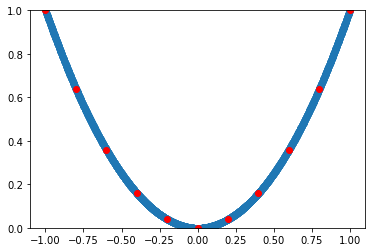

In [234]:
hgrid = np.array(list(map(h, xigrid)))
plt.scatter(xigrid, hgrid)
plt.ylim(0,1)
plt.scatter(xgrid,fgrid,color='red')
plt.show()

In [235]:
hmse = np.mean( (hgrid - f(xigrid))**2 )
print(hmse)

1.5725075519868317e-07
